# Selling Price prediction for Cars
> ### Abhishek Pandey | [LinkedIn](https://www.linkedin.com/in/abhishekpandeyit/) | [Twitter](https://twitter.com/itsme_abhi_)

## Introduction:
> I obtained this dataset from [Kaggle](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho), This dataset contains information about used cars listed on a Car selling website [Cardekho.com](www.cardekho.com).

> Using this dataset I am going to perform the selling price prediction for the cars based on the data available. I'll use RandomForest Ensemble to do this prediction.

## Python Libraries Used:

In [2]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For Numerical Analysis
import matplotlib.pyplot as plt # For Data Visualisation
import seaborn as sns # For attractive and informative graphics

## Data Wrangling and Analysis

In [3]:
""" Reading Data Set and storing in the Dataframe 'df' """

df=pd.read_csv('dataset.csv')

In [4]:
df.head(3) # Looking for first 3 rows of the Dataset

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0

In [5]:
'''Looking for number of rows and columns'''
print(f'Number of Rows : {df.shape[0]} \n Number of Columns : {df.shape[1]}')

Number of Rows : 301 
 Number of Columns : 9


In [6]:
df.columns #Looking for all the columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
# Checking for unique values

columns=["Car_Name","Year","Selling_Price","Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]
for title in columns:
    print(f"{title}: \n {df[title].unique()} \n\n")

Car_Name: 
 ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 

In [8]:
#Checking for null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Checking for general stats

df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [10]:
'''Introducing a new column to the data set as "Current_Year" and "No_Year" by substracting Year from Current Year Column '''

df['Current_Year']=2020

df["No_Year"]= df["Current_Year"]-df['Year']

In [11]:
# Checking for all the changes.

df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  Current_Year  No_Year  
0      Dealer       Manual      0          2020        6  
1      Dealer       Manual      0          2020        7  
2      Dealer       Manual      0          2020        3  
3      Dealer       Manual      0          2020        9  
4      Dealer       Manual      0          2020        6

In [12]:
'''droping all unwanted columns from the dataset, 
but first creating a copy of the dataset to prevent the dataloss which may occur'''
wrangled_df=df
wrangled_df.drop(["Year", "Car_Name", "Current_Year"], axis=1, inplace=True)

In [13]:
#Confirming Changes
wrangled_df.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  No_Year  
0       Manual      0        6  
1       Manual      0        7  
2       Manual      0        3  
3       Manual      0        9  
4       Manual      0        6

## Model Training and Deployment

In [14]:
# Converting categorical values into binary indicator values(0/1) using get_dummies function of pandas.
wrangled_df=pd.get_dummies(wrangled_df, drop_first=True)

In [15]:
#Confirming Changes so that we can move ahead.
wrangled_df.head(3)

Selling_Price  Present_Price  Kms_Driven  Owner  No_Year  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0        6                 0   
1           4.75           9.54       43000      0        7                 1   
2           7.25           9.85        6900      0        3                 0   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1

In [16]:
#Finding correlation between columns for a better analysis

wrangled_df.corr()

Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
No_Year                     -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                         No_Year  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price          -0.236141          0.552339         -0.540571   
Present_Price           0.047584          0.473306         -0.465244   
Kms_Driven              0.524342          0.172515         -0.172874   
Owner                   0.182104         -0.053469          0.055687   
No_Year                 1.000000         -0.064315          0.059959   
Fuel_Type_Diesel       -0.064315          1.000000         -0.979648   
Fuel_Type_Petrol        0.059959         -0.979648          1.000000   
Seller_Type_Individual  0.039896         -0.350467          0.358321   
Transmission_Manual    -0.000394         -0.098643          0.091013   

                        Seller_Type_Individual  Transmission_Manual  
Selling_Price                        -0.550724            -0.367128  
Present_Price                        -0.512030            -0.348715  
Kms_Driven                           -0.101419            -0.162510  
Owner                                 0.124269            -0.050316  
No_Year                               0.039896            -0.000394  
Fuel_Type_Diesel                     -0.350467            -0.098643  
Fuel_Type_Petrol                      0.358321             0.091013  
Seller_Type_Individual                1.000000             0.063240  
Transmission_Manual                   0.063240             1.000000

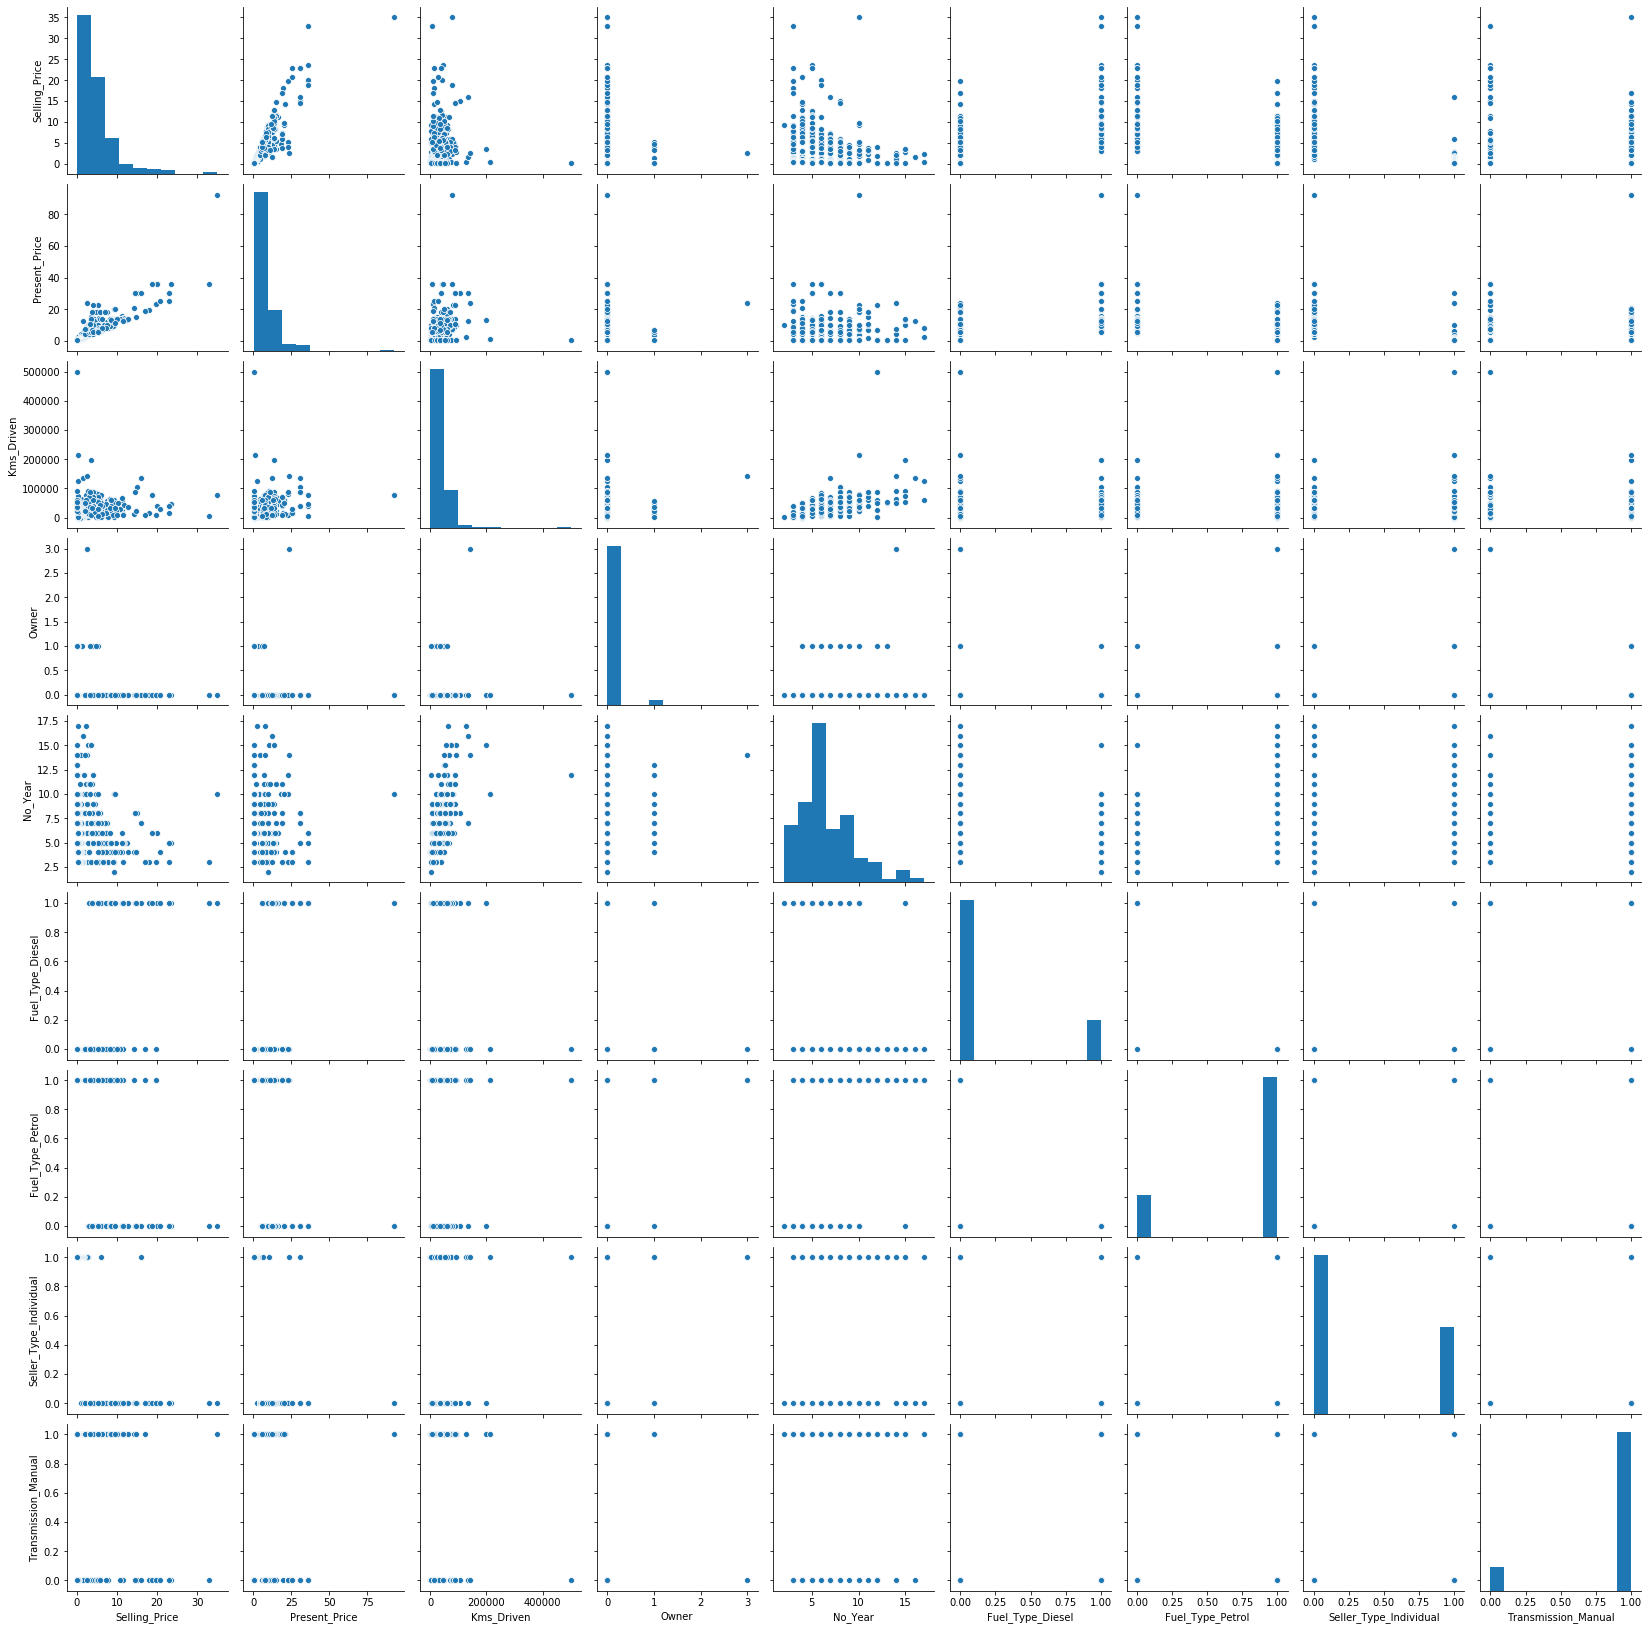

In [17]:
# Using paiplot for a better graphical visualisation of correlation
sns.pairplot(wrangled_df);

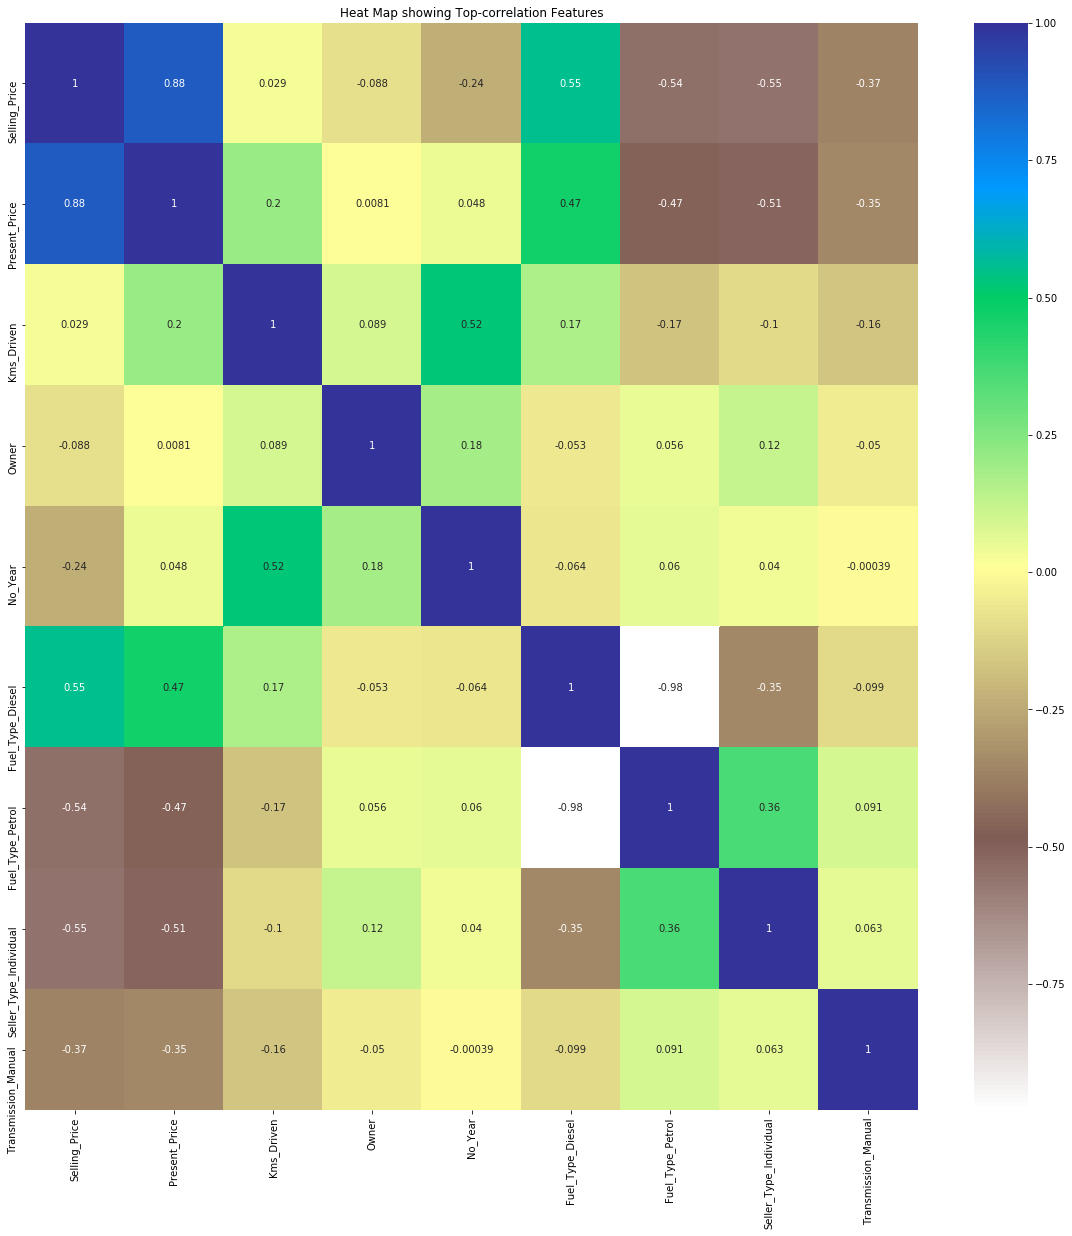

In [35]:
# Generating a Heatmap for visualisation for top correlation features between columns.
corrmat=wrangled_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(wrangled_df[top_corr_features].corr(), annot=True,cmap="terrain_r");
plt.title("Heat Map showing Top-correlation Features");

In [19]:
#Creating dependent and independent features
x=wrangled_df.iloc[:,1:] # All columns starting from index 1
y=wrangled_df.iloc[:,0] # Column at index 0

In [20]:
x.head(1)

Present_Price  Kms_Driven  Owner  No_Year  Fuel_Type_Diesel  \
0           5.59       27000      0        6                 0   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1

In [21]:
y.head(1)

0    3.35
Name: Selling_Price, dtype: float64

In [22]:
# Using ExtraTreesRegressor and ensemble of Sklearn Python library for feature importance

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [23]:
print(model.feature_importances_)

[0.39223154 0.04281352 0.00079951 0.07259324 0.22639946 0.00538576
 0.12182482 0.13795215]


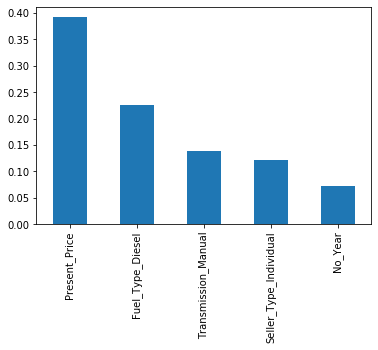

In [24]:
# Plotting graph of feature_importances_ for better Visualisation.

feat_importances =pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind= "bar")
plt.show();

In [25]:
# creating Test-train model for x and y using Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
x_train

Present_Price  Kms_Driven  Owner  No_Year  Fuel_Type_Diesel  \
13            7.71       26000      0        5                 0   
215           9.40       36100      0        8                 0   
30            5.98       51439      0        8                 1   
31            4.89       54200      0        9                 0   
25            4.99       20000      0        9                 0   
..             ...         ...    ...      ...               ...   
169           0.54       14000      0        5                 0   
184           0.75       26000      1       12                 0   
243           7.60        7000      0        4                 0   
140           1.20       32000      0        7                 0   
145           0.81       19000      0        8                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
13                  1                       0                    1  
215                 1                       0                    1  
30                  0                       0                    1  
31                  1                       0                    1  
25                  1                       0                    1  
..                ...                     ...                  ...  
169                 1                       1                    1  
184                 1                       1                    1  
243                 1                       0                    1  
140                 1                       1                    1  
145                 1                       1                    1  

[240 rows x 8 columns]

In [27]:
# IMporting Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [28]:
#Hyperparameters for the model

import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [29]:
from sklearn.model_selection import RandomizedSearchCV # importing RandomizedSearchCV

In [30]:
#RandomizedSearchCV
#Number of trees in RandomForest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of Features to consider at every split
max_features=['auto','sqrt']
# Maximum numbers of levels in trees
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
# max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split =[2,5,10,15,100]
# Minimum number of samples required at each left node
min_samples_leaf=[1,2,5,10]

In [31]:
# Create random grid
random_grid={"n_estimators" : n_estimators,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
     "max_features":max_features,
    }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [32]:
#Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [33]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [34]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_sampl

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [36]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [37]:
rf_random.best_score_

-3.7387598801159667

In [38]:
predictions=rf_random.predict(x_test)

Text(0.5, 1.0, 'Distribution between the model prediction and test dataset')

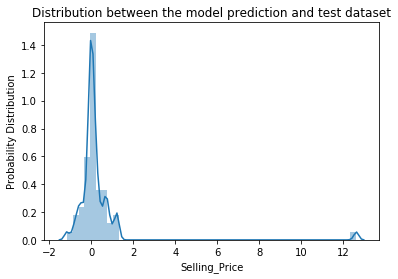

In [39]:
sns.distplot(y_test-predictions);
plt.ylabel("Probability Distribution")
plt.title("Distribution between the model prediction and test dataset")

Text(0.5, 1.0, 'Scatterplot for Prediction distribution')

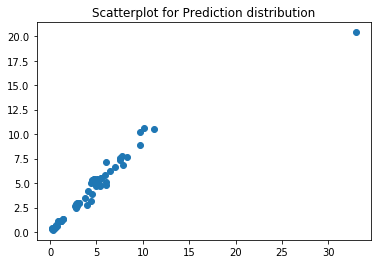

In [40]:
plt.scatter(y_test,predictions);
plt.title("Scatterplot for Prediction distribution")

In [41]:
from sklearn import metrics # Importing metrics to measure classification performance

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5294104429539327
MSE: 2.837089098735555
RMSE: 1.684366082161344


In [43]:
# Generating a Pickle File for model deployment

import pickle
# opening a file, to store the data
file = open('RandomForestModel.pkl', 'wb')

# Dumping information to the file
pickle.dump(rf_random, file)